<a href="https://colab.research.google.com/github/AarthySwetha/23ADR002-AARTHY-SWETHA/blob/main/CHURN_IDENTIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
customer_df=pd.read_csv("Customer Churn.csv")
print(customer_df.head())


   Call  Failure  Complains  Subscription  Length  Seconds of Use  \
0              8          0                    38            4370   
1              0          0                    39             318   
2             10          0                    37            2453   
3             10          0                    38            4198   
4              3          0                    38            2393   

   Frequency of use  Frequency of SMS  Distinct Called Numbers  Status  Churn  
0                71                 5                       17       1      0  
1                 5                 7                        4       0      0  
2                60               359                       24       1      0  
3                66                 1                       35       1      0  
4                58                 2                       33       1      0  


In [ ]:
from sklearn.ensemble import RandomForestClassifier

y=customer_df['Churn']
Xs = customer_df.drop(columns=['Churn'])

rf = RandomForestClassifier(n_estimators=1000)
rf.fit(Xs, y)

RandomForestClassifier(n_estimators=1000)

In [ ]:
rf.feature_importances_

array([0.07170306, 0.19906821, 0.12775128, 0.16297505, 0.13270308,
       0.07781693, 0.09098121, 0.13700118])

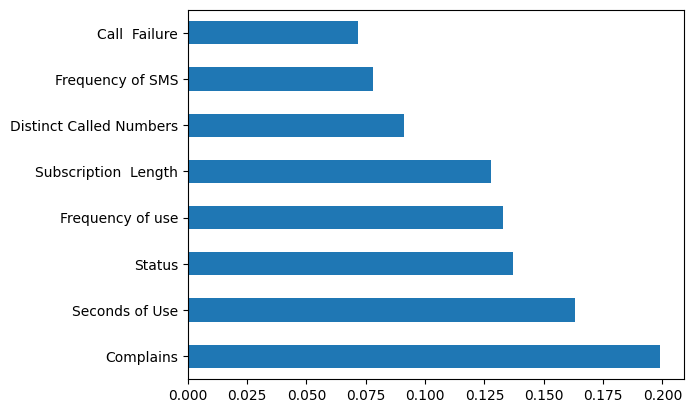

In [ ]:
importance_sr = pd.Series(rf.feature_importances_,index =Xs.columns)
importance_sr.sort_values(ascending=False).plot.barh()
plt.show()

In [ ]:
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV

in_atts = ['Call  Failure', 'Complains', 'Subscription  Length',
           'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
           'Distinct Called Numbers', 'Status']
n_in_atts = len(in_atts)
result_df = pd.DataFrame(columns = ['subset_candidate','best_k',
                                    'performance'])
customer_df_std = (customer_df - customer_df.min())/(
    customer_df.max() - customer_df.min())

for n in range(1,n_in_atts+1):
    for atts in itertools.combinations(in_atts, r=n):
        atts = list(atts)
        Xs = customer_df_std[atts]
        y= customer_df['Churn']

        # Tune KNN
        param_grid = {
            'n_neighbors':[1,3,5,7]}
        gridSearch = GridSearchCV(KNeighborsClassifier(),
                          param_grid, cv=2, scoring='recall')
        gridSearch.fit(Xs, y)
        best_k= gridSearch.best_params_['n_neighbors']

        # Train the tuned KNN
        knn = KNeighborsClassifier(best_k)
        knn.fit(Xs, y)

        # Prediction
        y_predict = knn.predict(Xs)

        # Performance evaluation
        dic_append = {'subset_candidate':atts, 'best_k': best_k,
                      'performance': recall_score(y,y_predict)}

        # Recording and Reporting

        print(dic_append)

{'subset_candidate': ['Call  Failure'], 'best_k': 3, 'performance': 0.050505050505050504}
{'subset_candidate': ['Complains'], 'best_k': 1, 'performance': 1.0}
{'subset_candidate': ['Subscription  Length'], 'best_k': 1, 'performance': 0.14343434343434344}
{'subset_candidate': ['Seconds of Use'], 'best_k': 1, 'performance': 0.8282828282828283}
{'subset_candidate': ['Frequency of use'], 'best_k': 5, 'performance': 0.1191919191919192}
{'subset_candidate': ['Frequency of SMS'], 'best_k': 1, 'performance': 0.11313131313131314}
{'subset_candidate': ['Distinct Called Numbers'], 'best_k': 1, 'performance': 0.30303030303030304}
{'subset_candidate': ['Status'], 'best_k': 3, 'performance': 0.0}
{'subset_candidate': ['Call  Failure', 'Complains'], 'best_k': 5, 'performance': 0.397979797979798}
{'subset_candidate': ['Call  Failure', 'Subscription  Length'], 'best_k': 1, 'performance': 0.43434343434343436}
{'subset_candidate': ['Call  Failure', 'Seconds of Use'], 'best_k': 3, 'performance': 0.6383838

In [ ]:
result_df.sort_values('performance',ascending=False)

,subset_candidate,best_k,performance
